In [815]:
import sys, os
from datetime import datetime
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import Environment as env_mod
import dealer as dealer_mod
import truck as truck_mod
import DataArrangement as data_mod


# simulator class
importlib.reload(env_mod)
SimulationConfig = env_mod.SimulationConfig
Simulator = env_mod.Simulator

# dealer class
importlib.reload(dealer_mod)
Dealer = dealer_mod.Dealer

# truck class
importlib.reload(truck_mod)  
Truck = truck_mod.Truck      
create_fleet = truck_mod.create_fleet

# data arrangement class
importlib.reload(data_mod)
DataArrange = data_mod.DataArrange

In [816]:
# Simulator Configuration
cfg = SimulationConfig(
    start_time = datetime(2025, 1, 1),
    total_time = 365,
    delta_time = 1
)

# Simulator
sim = Simulator(config=cfg, seed=1, n_dealers=2)
events = sim.run()
# print(events[:10])

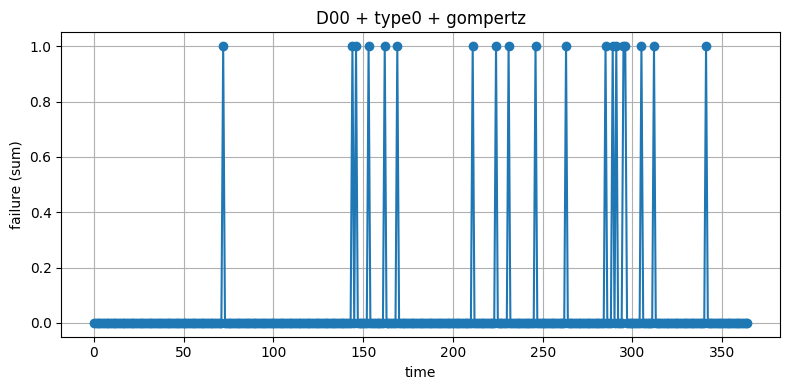

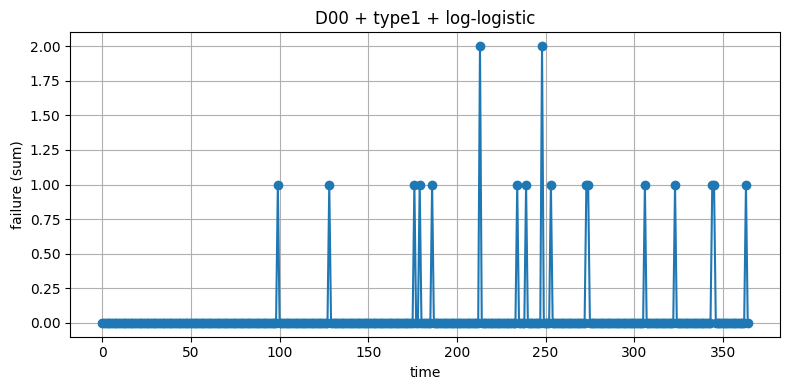

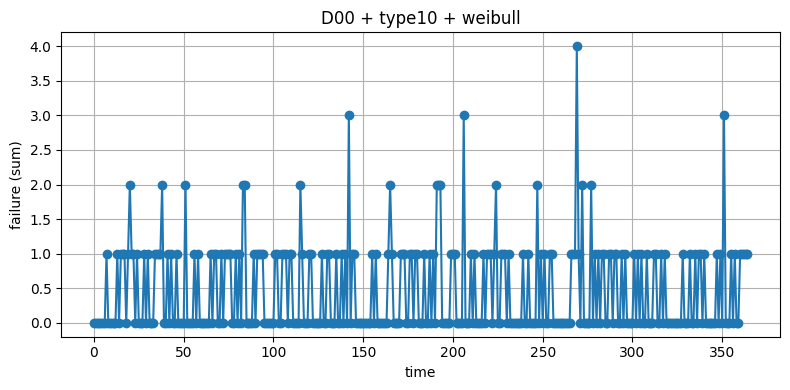

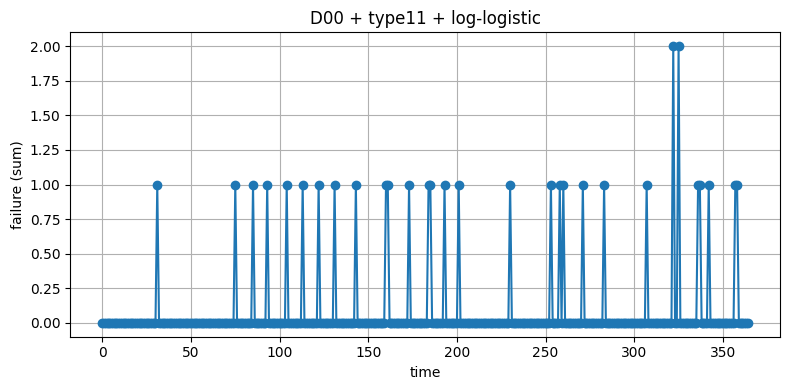

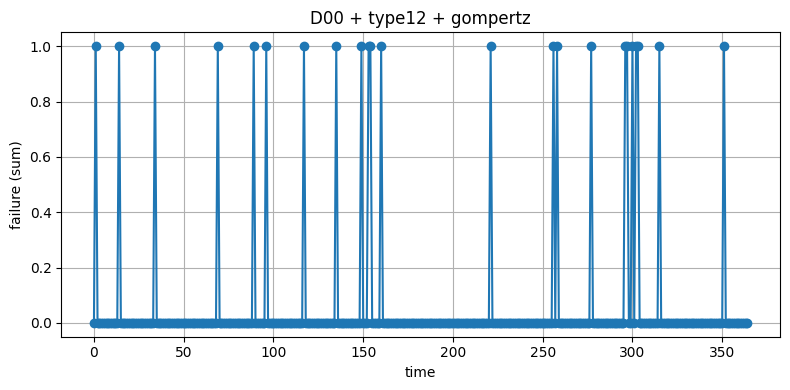

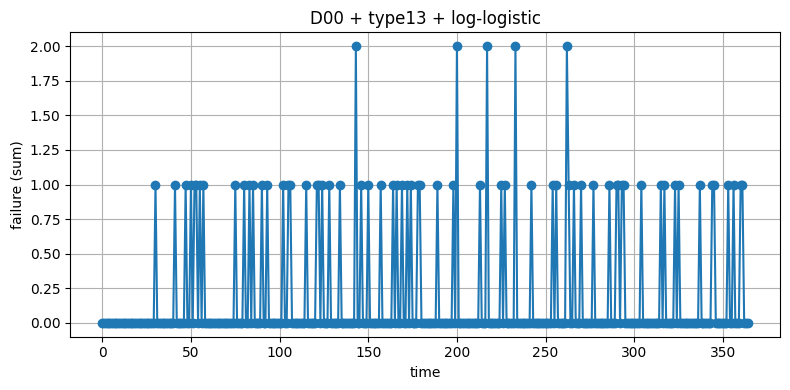

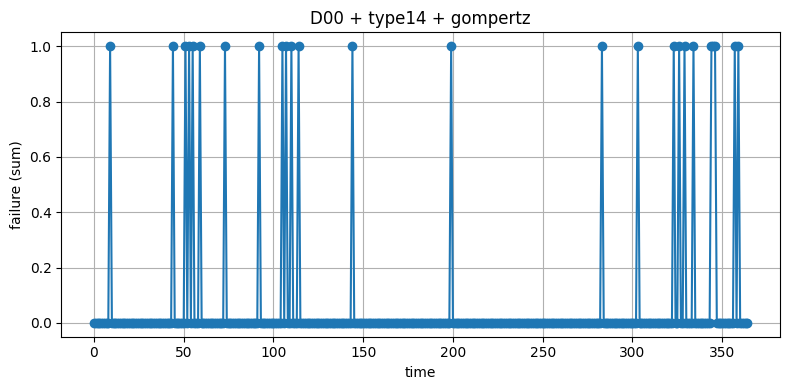

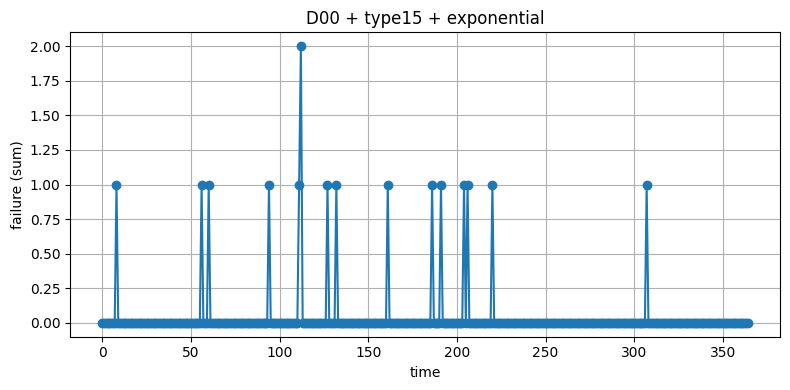

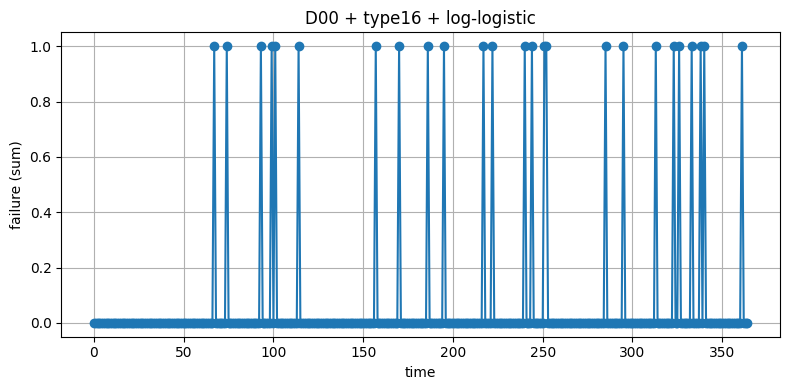

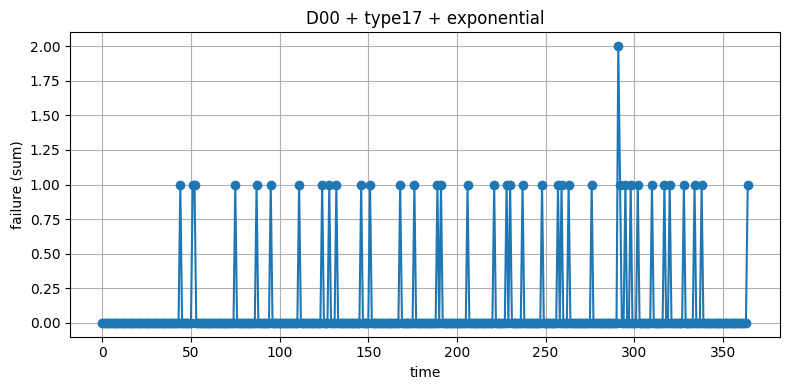

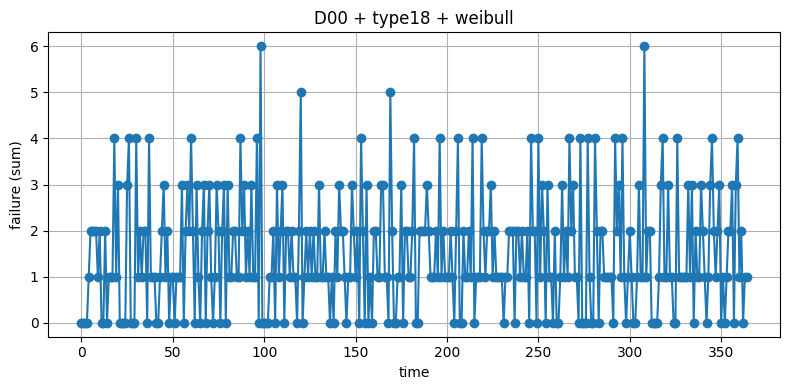

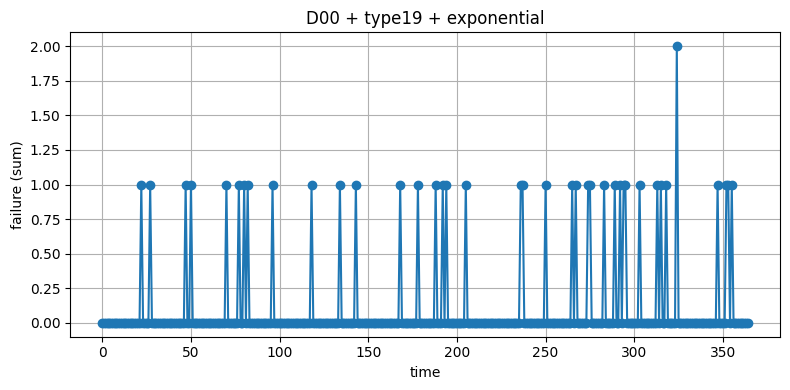

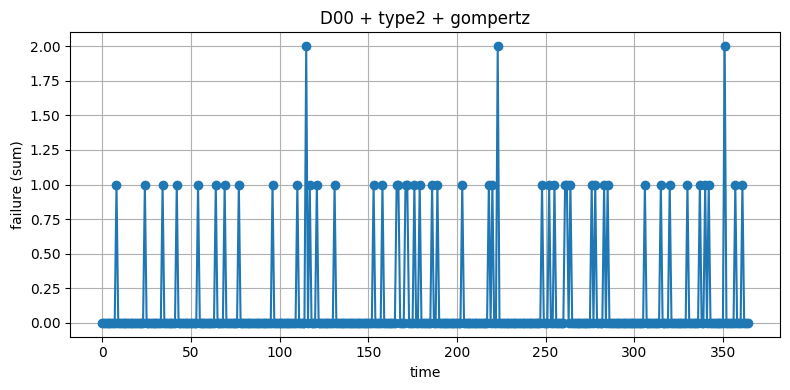

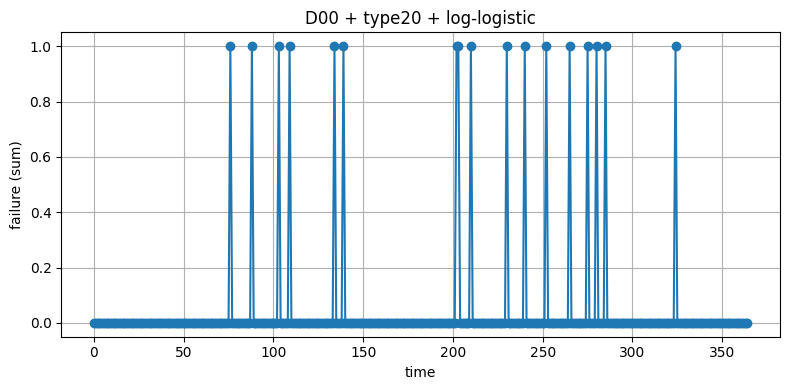

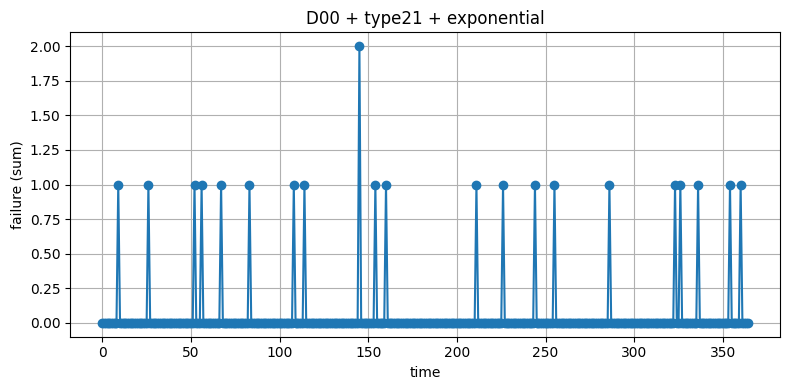

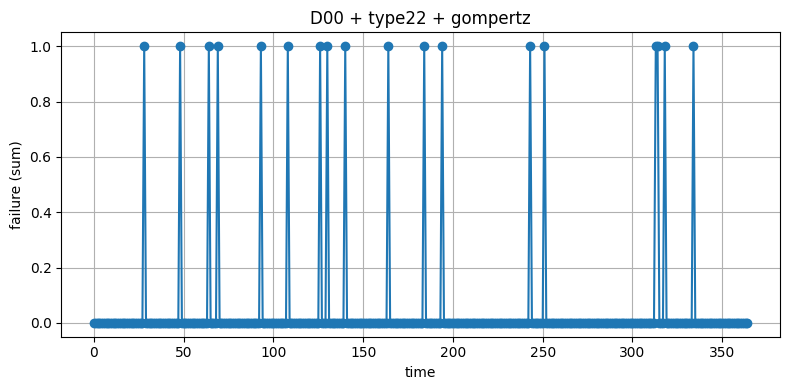

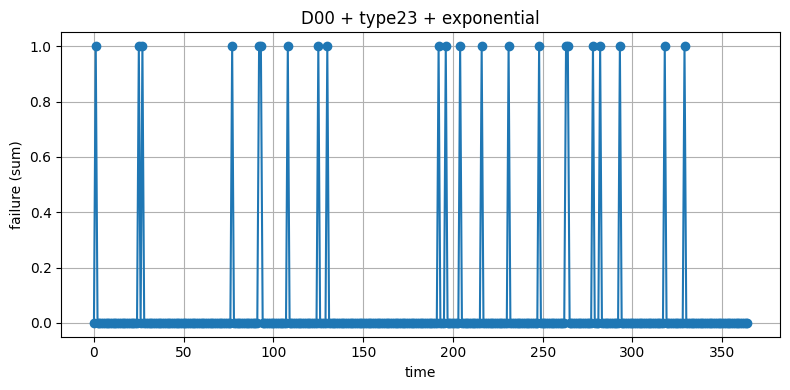

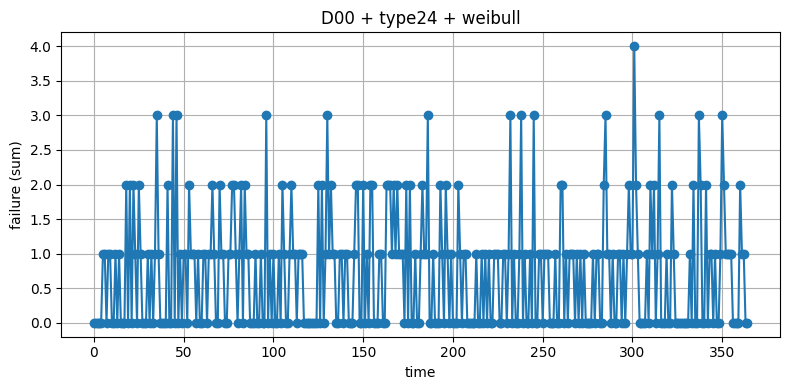

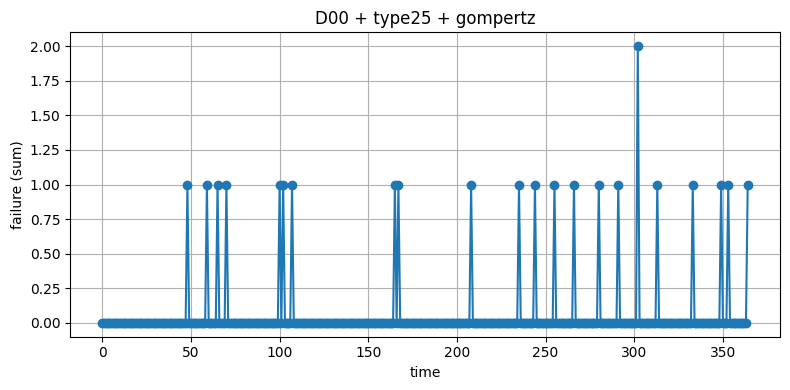

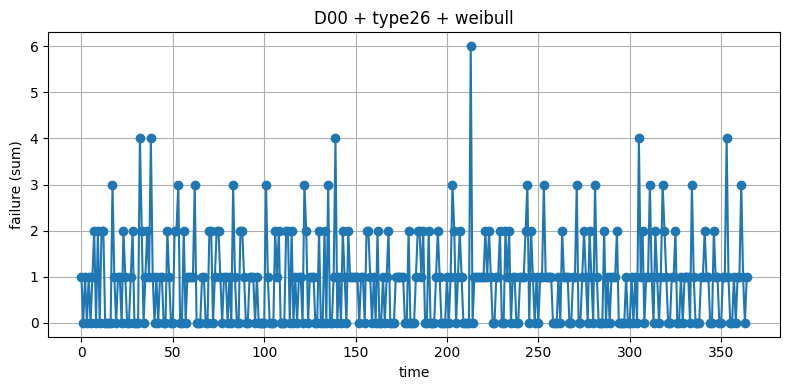

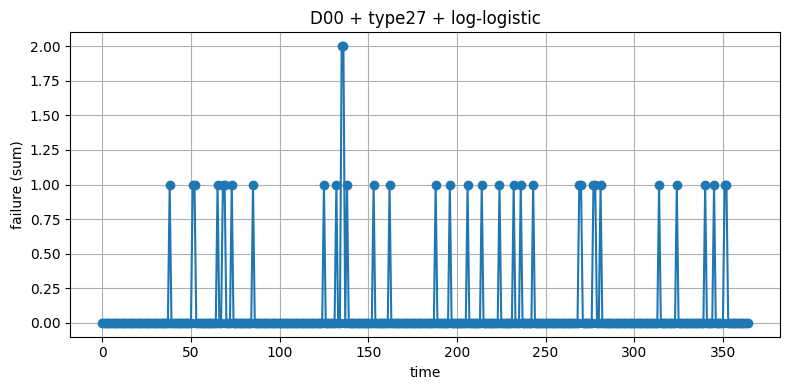

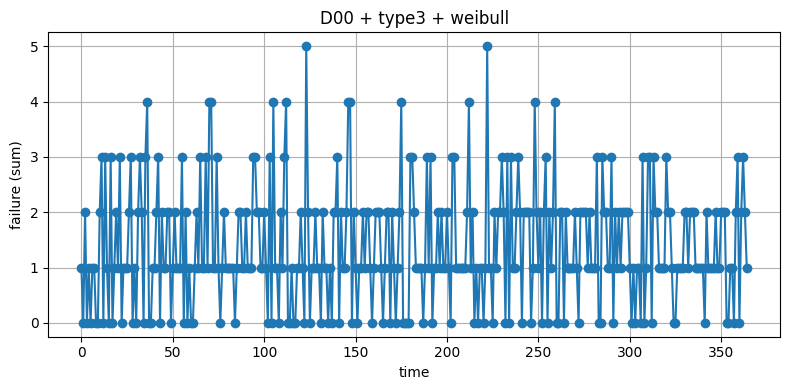

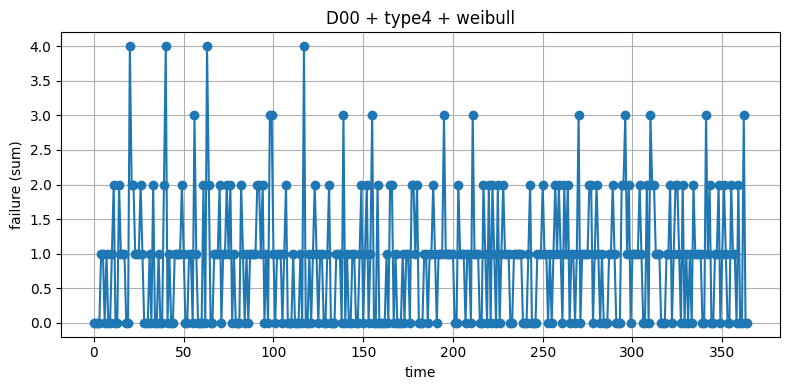

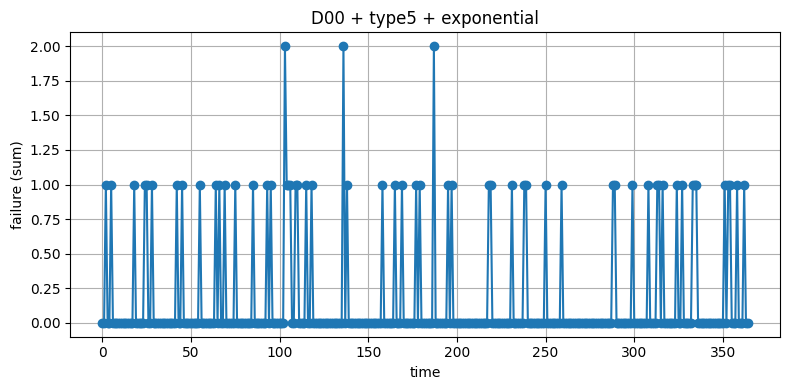

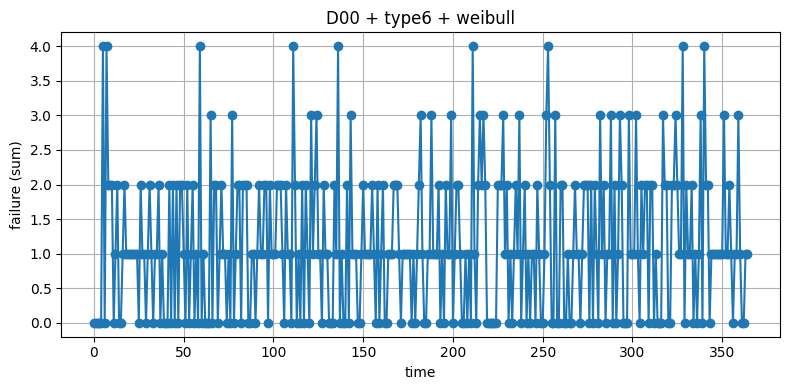

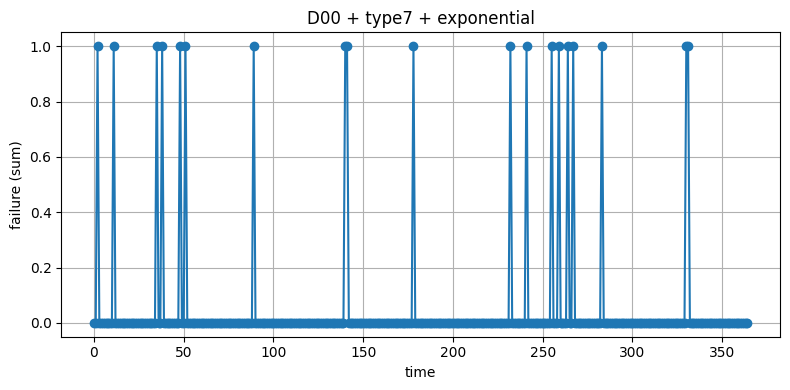

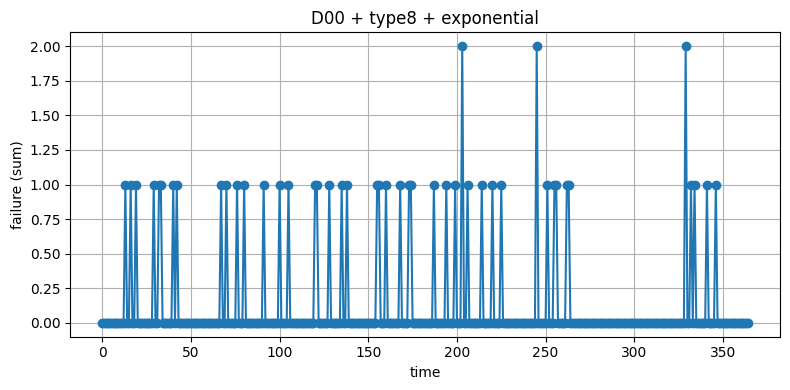

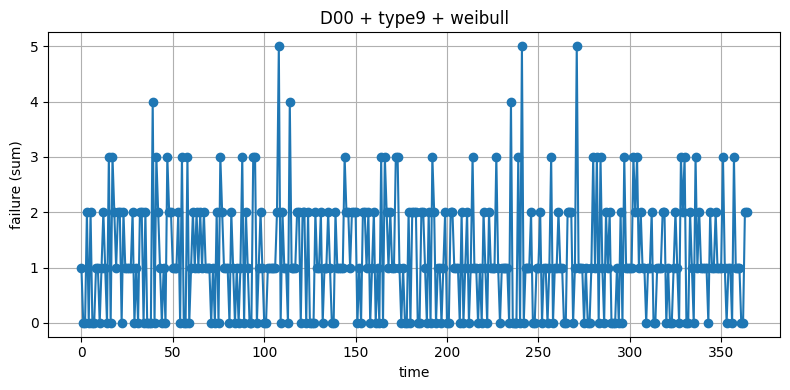

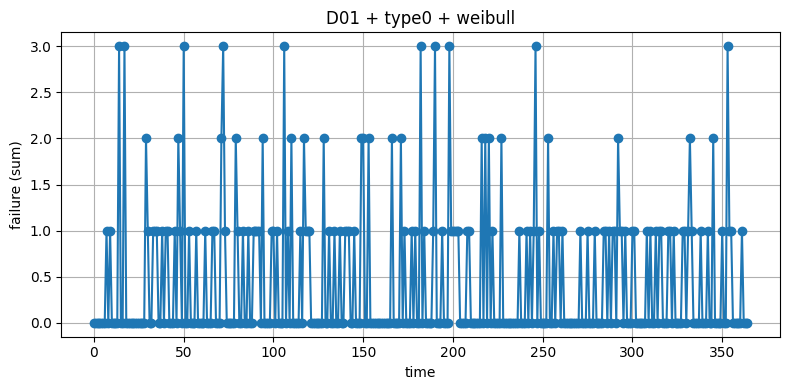

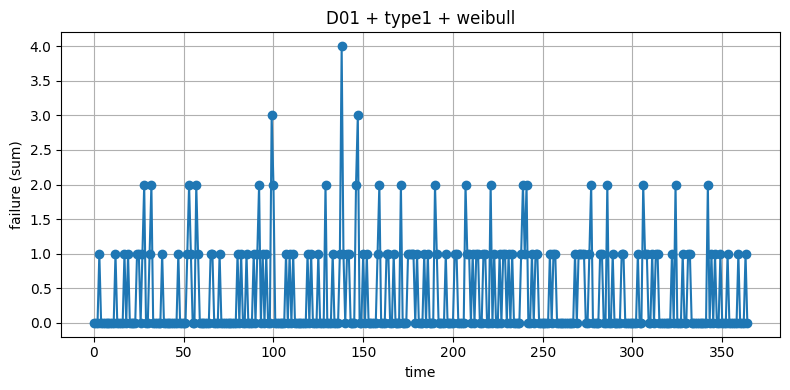

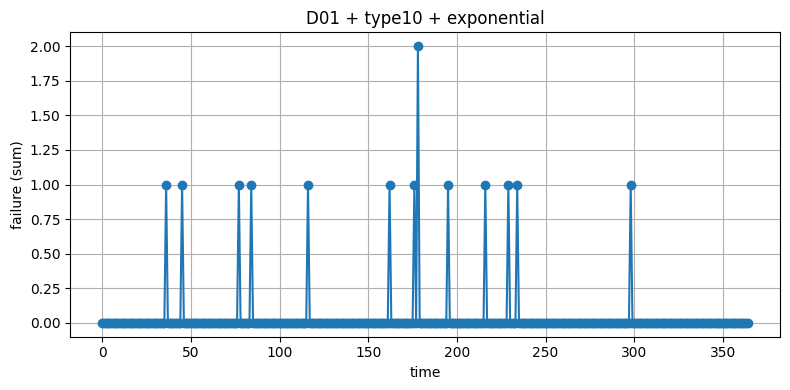

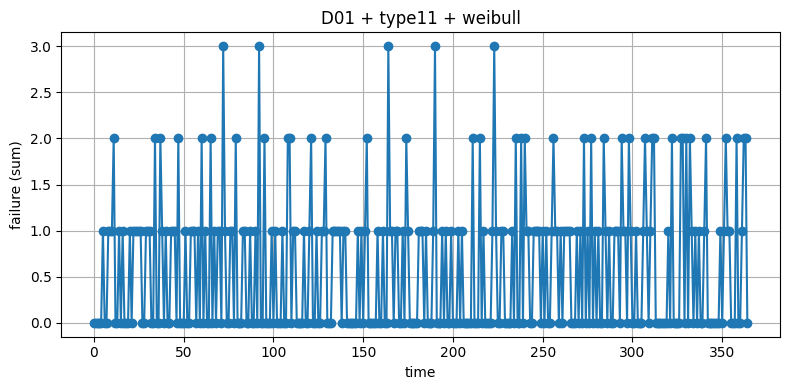

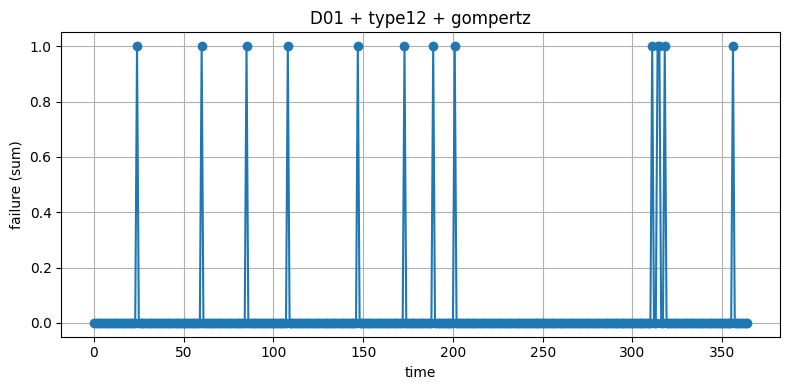

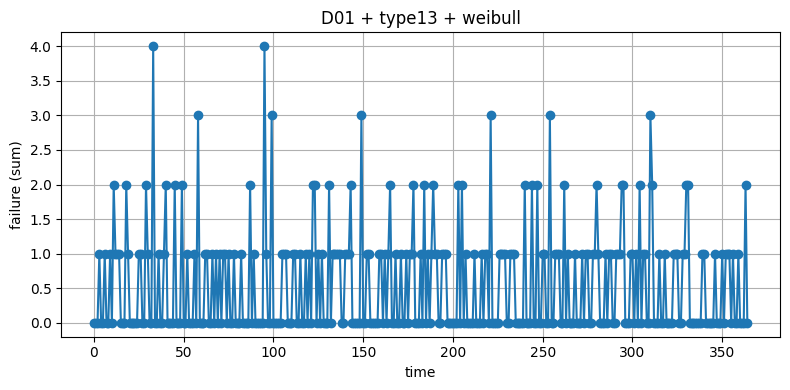

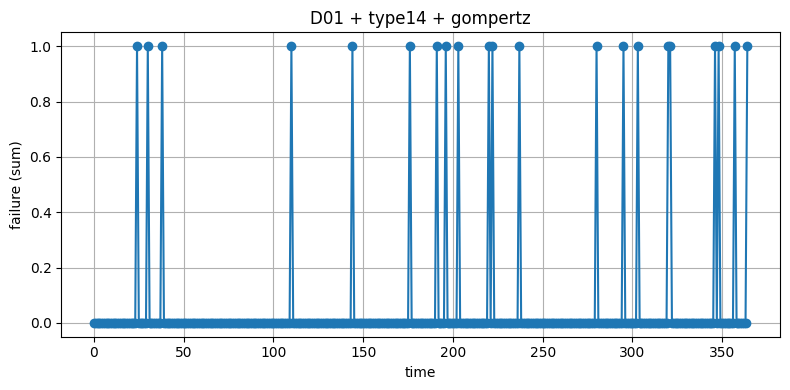

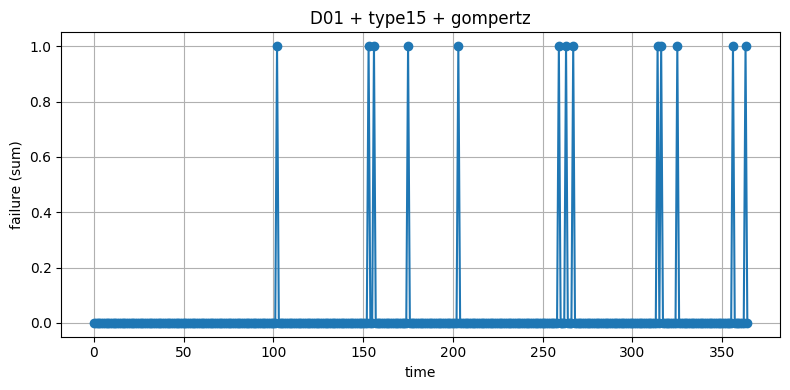

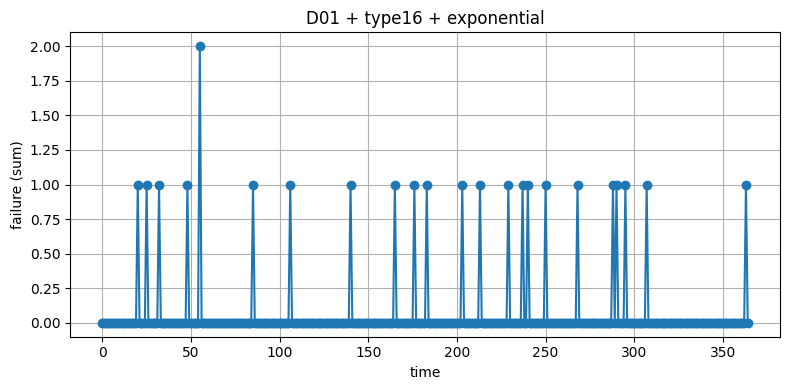

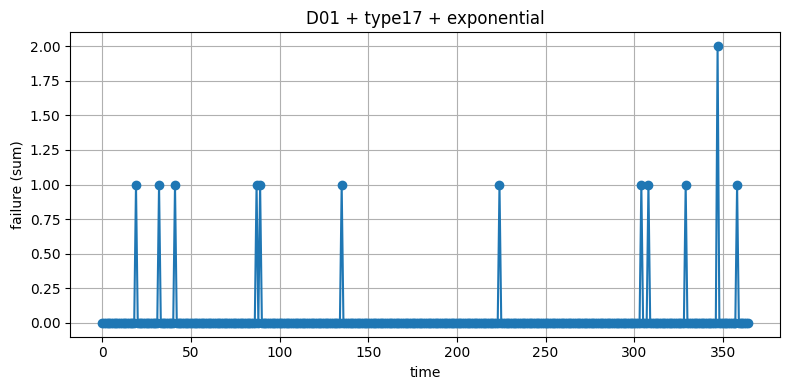

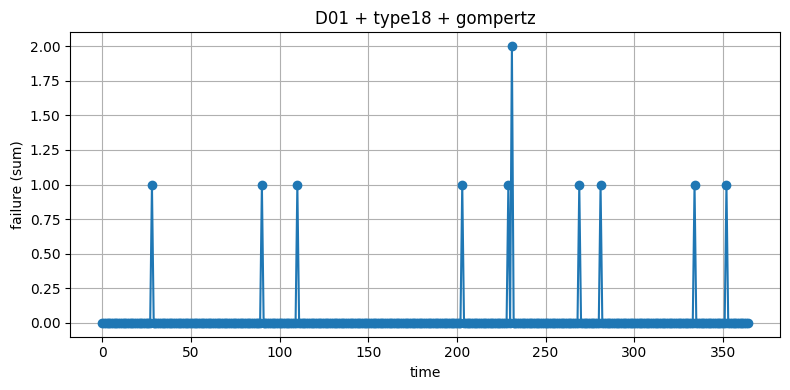

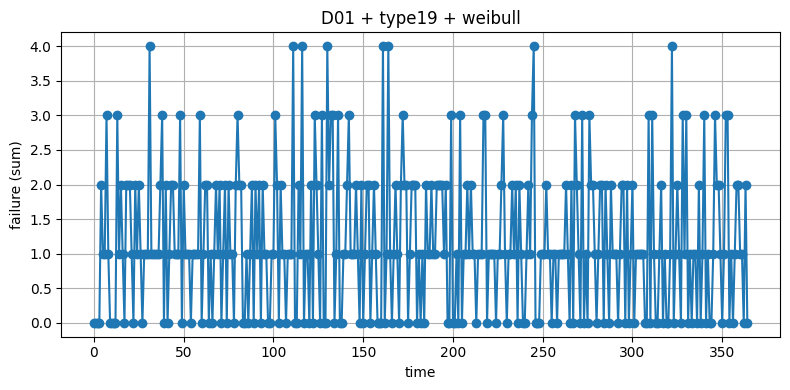

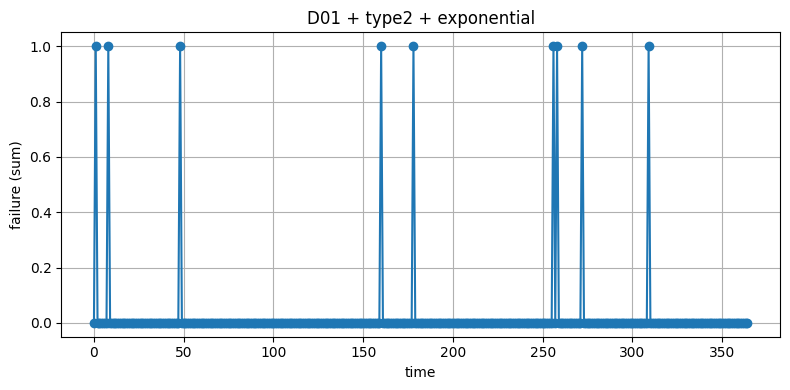

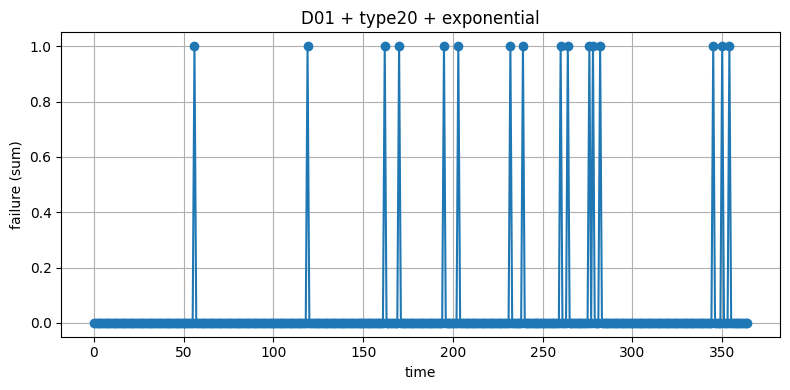

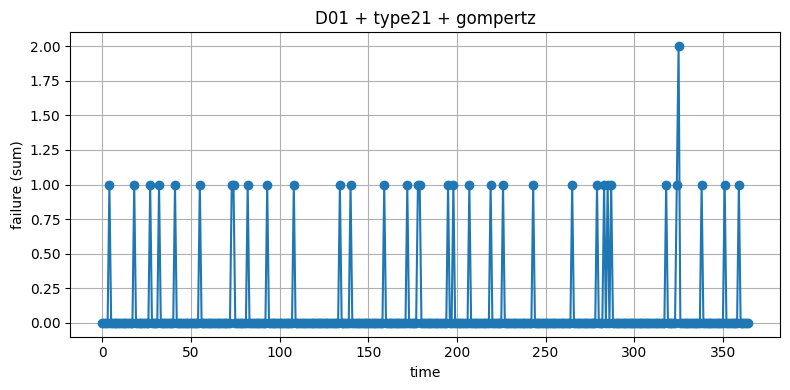

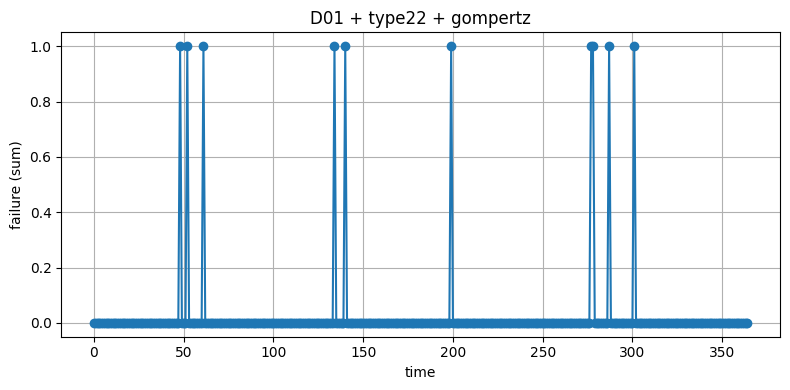

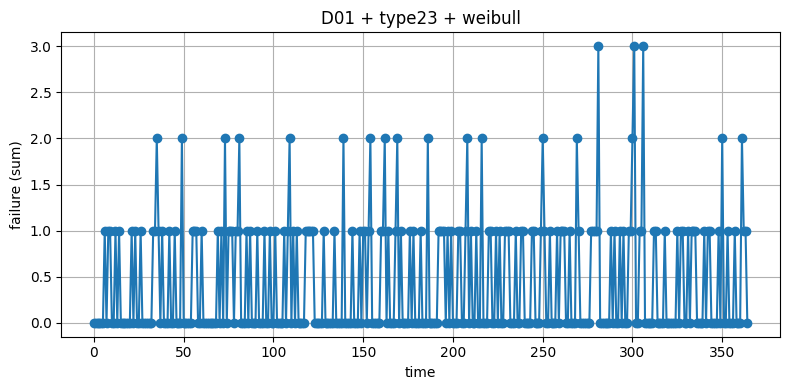

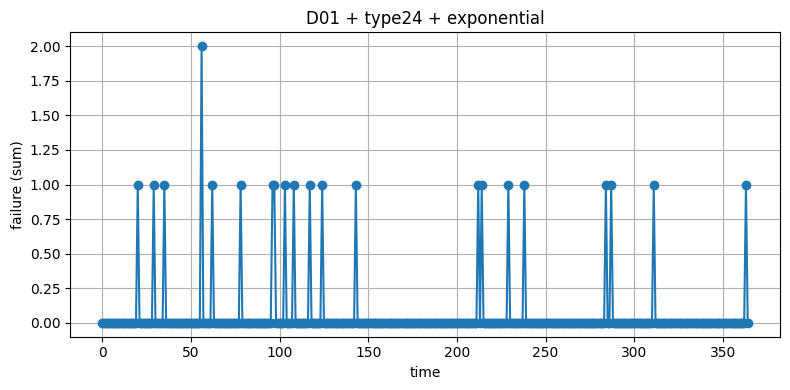

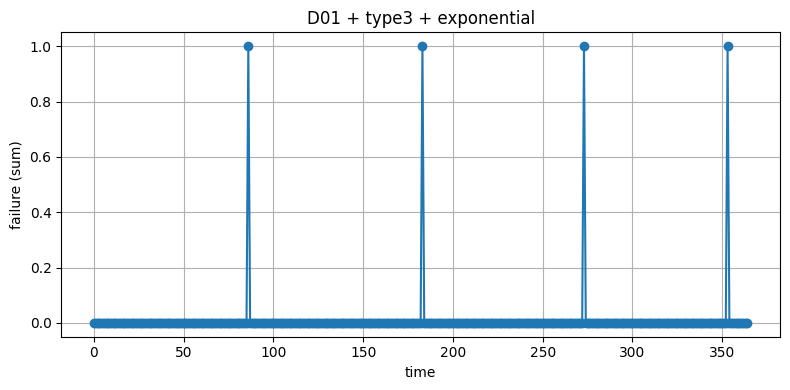

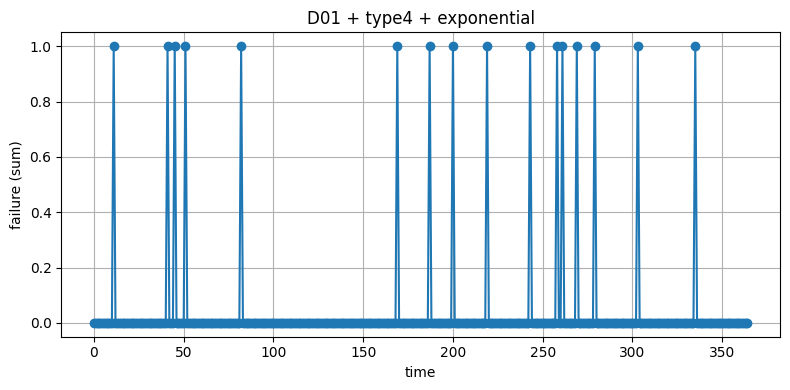

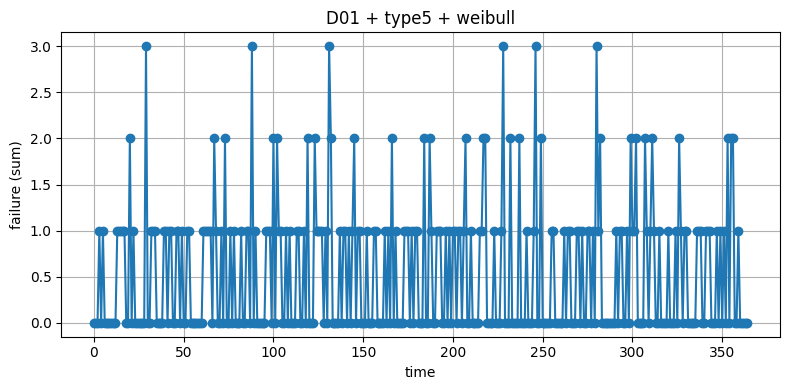

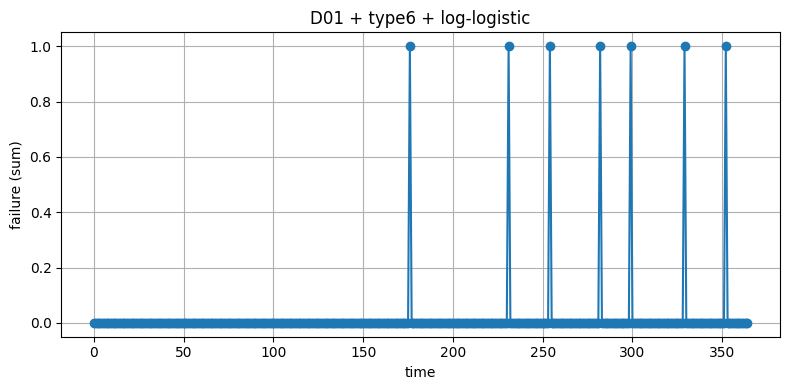

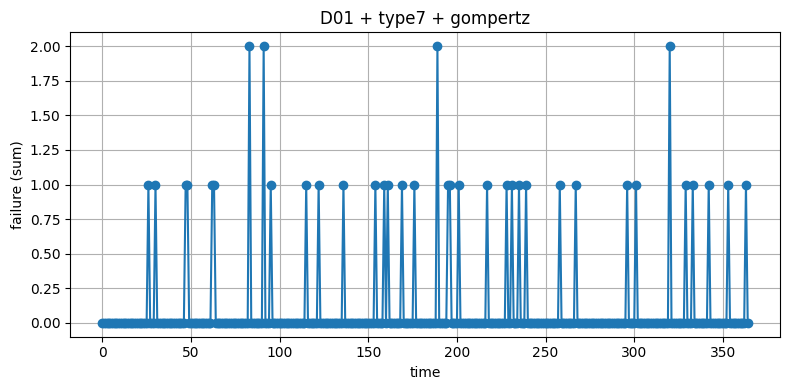

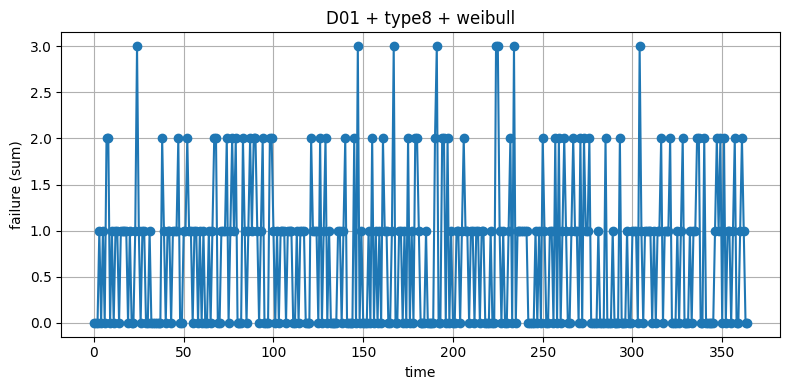

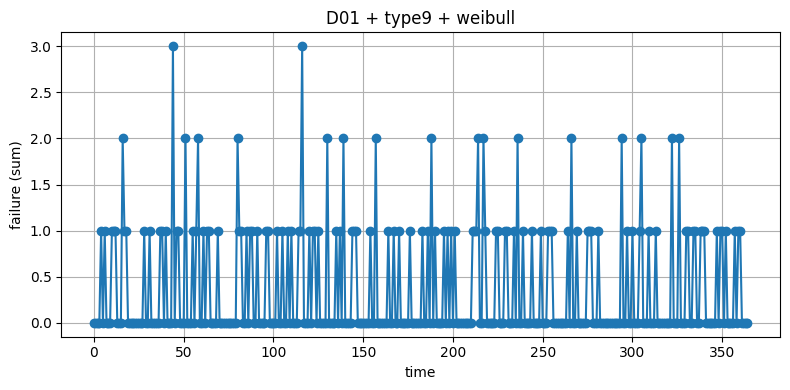

In [817]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)
# print(data_arrange.event_data)

for (dealer, pt), df_sub in data_arrange.part_type_dealer_sort.groupby(["dealer_id", "part_type"]):
    plt.figure(figsize=(8, 4))
    f_model = sim.dealer_failure_model[dealer][pt]["failure_model"]
    plt.plot(df_sub["time"], df_sub["failure"], marker="o", linestyle="-")
    title = f"{dealer} + {pt} + {f_model}"
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("failure (sum)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [818]:
# import matplotlib.pyplot as plt
# import re

# # Data Arrangement
# data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# # each part 
# for col in data_arrange.data_partid.columns[:10]:
#     part_type = re.search(r"type\d+", col).group(0)
#     data_arrange.data_partid[col].plot(figsize=(8,4), title=str(col)+": "+sim.PART_INFO[part_type]["failure_model"])
#     plt.xlabel("Date")
#     plt.ylabel("Demand")
#     plt.grid(True)
#     plt.show()

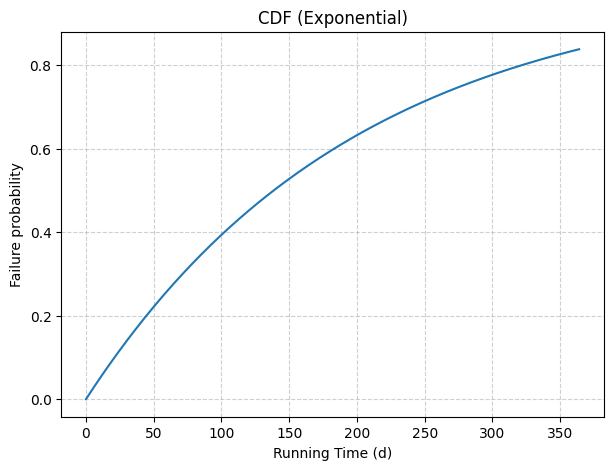

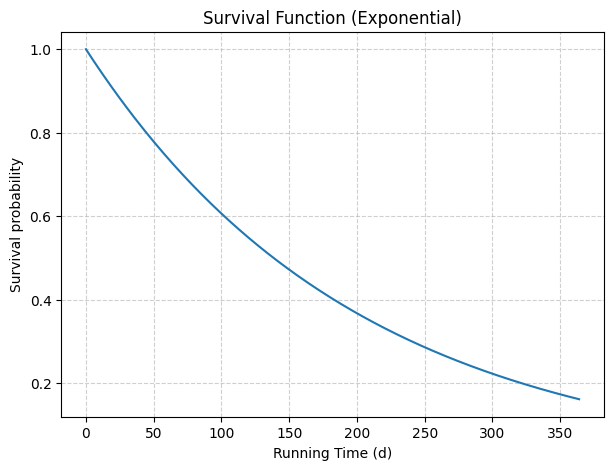

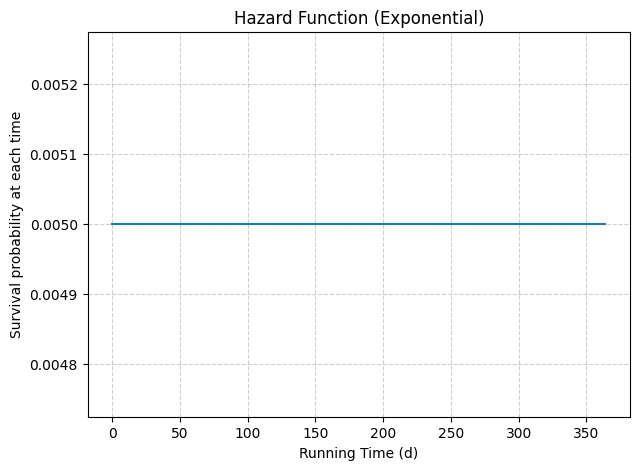

In [819]:
sys.path.append(os.path.abspath('./documents/SurvivalModel'))
import Function as func_mod

# Probability Function class
importlib.reload(func_mod)
Model = func_mod.ProbabilityModel

# Exponential model
model_name = "Exponential"
model = Model(model_name = model_name)
model.draw()

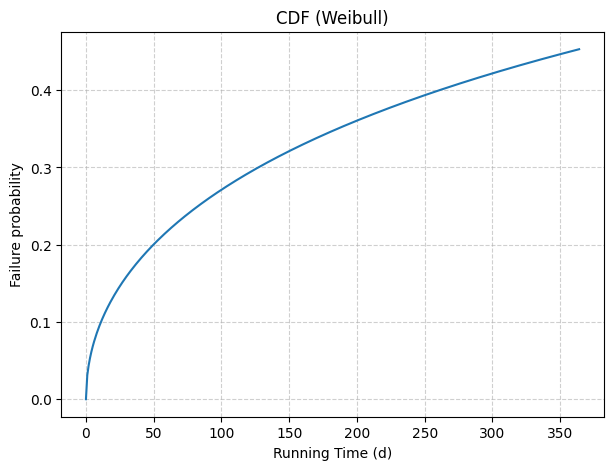

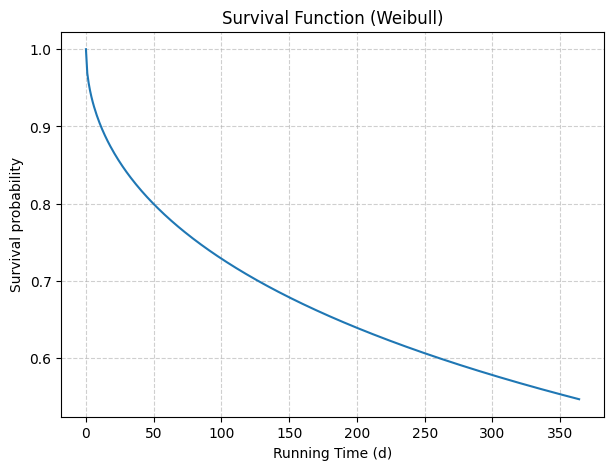

c:\Users\sosou\PartDemand_Simulator\documents\SurvivalModel\Function.py:56: RuntimeWarning: divide by zero encountered in power
  return (alpha / lambda0) * (time_range / lambda0) ** (alpha-1)


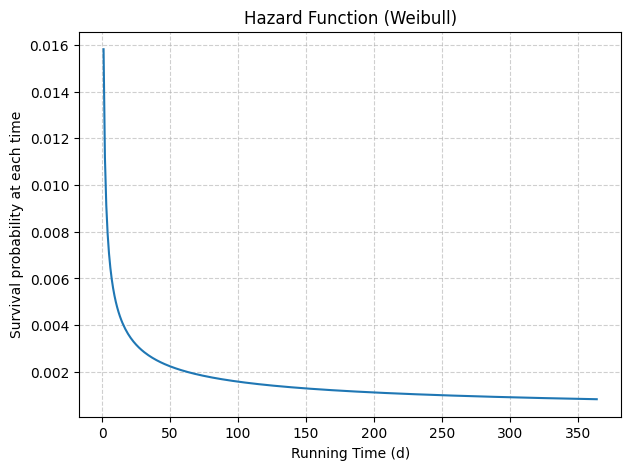

In [820]:
#  model
model_name = "Weibull"
model = Model(model_name = model_name)
model.draw()

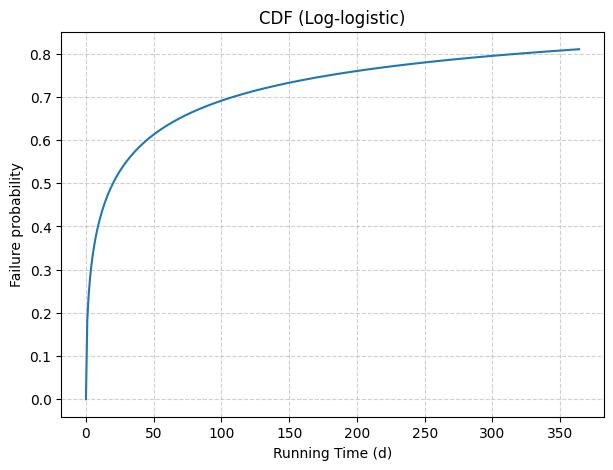

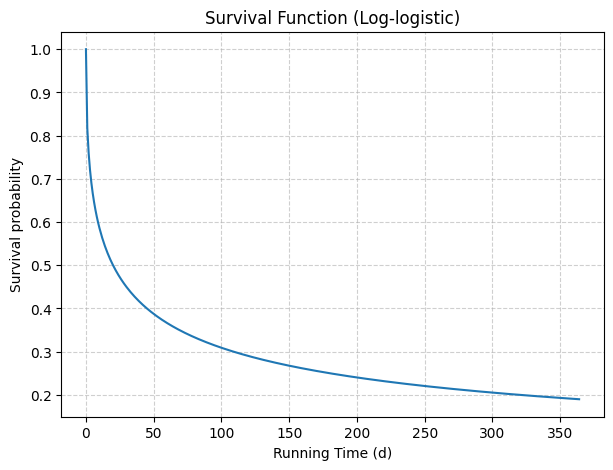

c:\Users\sosou\PartDemand_Simulator\documents\SurvivalModel\Function.py:61: RuntimeWarning: divide by zero encountered in power
  numerator = (beta / alpha) * ( (time_range / alpha) ** (beta - 1) )


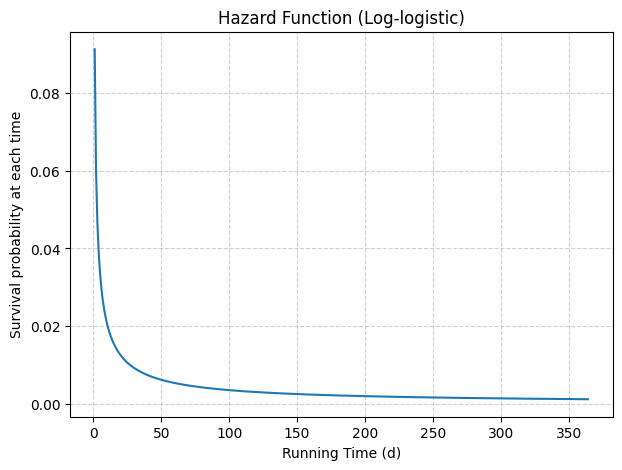

In [821]:
#  model
model_name = "Log-logistic"
model = Model(model_name = model_name)
model.draw()

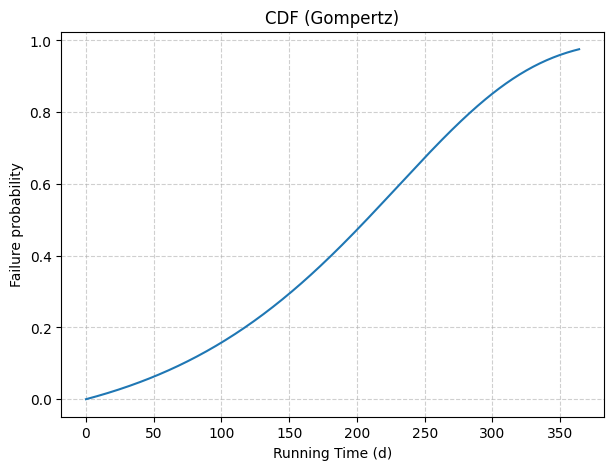

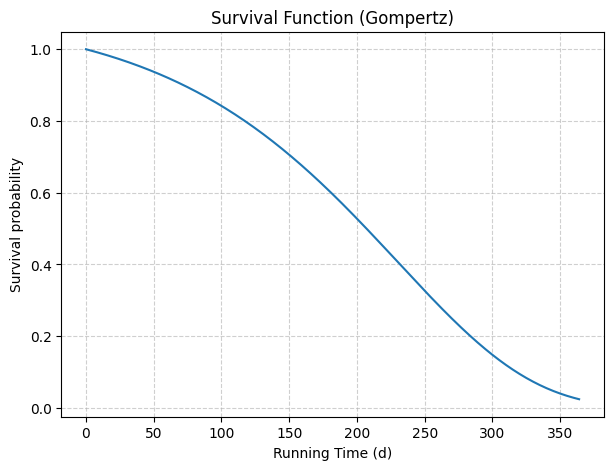

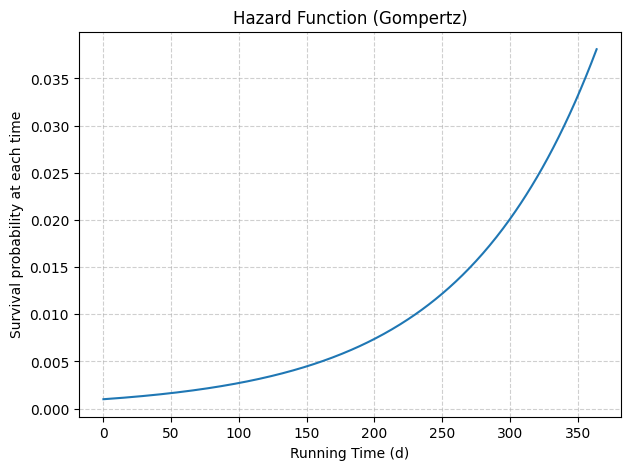

In [822]:
#  model
model_name = "Gompertz"
model = Model(model_name = model_name)
model.draw()